In [1]:
df_dist1 <- read.csv(file="Sargento_meteo.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)

In [2]:
head(df_dist1)

TIMESTAMP,Year,Month,DOY,Hour,RECORD,BattV_Min,AirTC_Avg,RH,Rain_mm_Tot,⋯,ea,VPD..hPa.,VPD..kPa.,A_0,A_1,A_2,A_3,A_4,A_5,A_6
7/6/2013,2013,Julio,187,13.0,18,15.97,33.97,41.10,0,⋯,2.182804,31.28155,3.128155,6.1078,0.444,0.0143,0.000265,3.03e-06,2.03e-08,6.14e-11
7/6/2013,2013,Julio,187,13.0,19,15.46,33.74,54.89,0,⋯,2.878030,23.65238,2.365238,NA,NA,NA,NA,NA,NA,NA
7/6/2013,2013,Julio,187,13.5,20,15.21,33.14,59.50,0,⋯,3.016764,20.53428,2.053428,NA,NA,NA,NA,NA,NA,NA
7/6/2013,2013,Julio,187,13.5,21,15.21,33.25,47.87,0,⋯,2.442110,26.59436,2.659436,NA,NA,NA,NA,NA,NA,NA
7/6/2013,2013,Julio,187,13.5,22,15.26,33.86,52.28,0,⋯,2.759595,25.18896,2.518896,NA,NA,NA,NA,NA,NA,NA
7/6/2013,2013,Julio,187,14.0,23,14.97,33.48,48.55,0,⋯,2.508894,26.58755,2.658755,NA,NA,NA,NA,NA,NA,NA


In [3]:
str(df_dist1)

'data.frame':	177436 obs. of  35 variables:
 $ TIMESTAMP                                       : chr  "7/6/2013" "7/6/2013" "7/6/2013" "7/6/2013" ...
 $ Year                                            : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ Month                                           : chr  "Julio" "Julio" "Julio" "Julio" ...
 $ DOY                                             : int  187 187 187 187 187 187 187 187 187 187 ...
 $ Hour                                            : num  13 13 13.5 13.5 13.5 14 14 14 14.5 14.5 ...
 $ RECORD                                          : int  18 19 20 21 22 23 24 25 26 27 ...
 $ BattV_Min                                       : num  16 15.5 15.2 15.2 15.3 ...
 $ AirTC_Avg                                       : num  34 33.7 33.1 33.2 33.9 ...
 $ RH                                              : num  41.1 54.9 59.5 47.9 52.3 ...
 $ Rain_mm_Tot                                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ WS_ms_

In [8]:
df1 <-  df_dist1[,c(11,12)]

In [9]:
df1$WindDir_D1_WVT <- as.numeric(df1$WindDir_D1_WVT)
str(df1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

'data.frame':	177436 obs. of  2 variables:
 $ WS_ms_S_WVT   : num  2.25 2.78 3.38 2.57 2.8 ...
 $ WindDir_D1_WVT: num  232 237 240 246 241 ...


In [10]:
df_Wind <- df1

In [11]:
str(df_Wind)

'data.frame':	177436 obs. of  2 variables:
 $ WS_ms_S_WVT   : num  2.25 2.78 3.38 2.57 2.8 ...
 $ WindDir_D1_WVT: num  232 237 240 246 241 ...


In [12]:
df_Wind <- df_Wind[complete.cases(df_Wind), ]
names(df_Wind) <- c("spd", "dir")
str(df_Wind)

'data.frame':	169193 obs. of  2 variables:
 $ spd: num  2.25 2.78 3.38 2.57 2.8 ...
 $ dir: num  232 237 240 246 241 ...


In [13]:
summary(df_Wind)

      spd              dir       
 Min.   : 0.000   Min.   :  0.0  
 1st Qu.: 1.061   1st Qu.:101.5  
 Median : 1.944   Median :181.6  
 Mean   : 2.323   Mean   :189.9  
 3rd Qu.: 3.281   3rd Qu.:307.6  
 Max.   :16.470   Max.   :360.0  

In [35]:
install.packages("ggthemes") # Install

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [14]:
require(ggplot2)
require(RColorBrewer)
require(ggthemes)

Loading required package: ggplot2
Loading required package: RColorBrewer
Loading required package: ggthemes


In [15]:
plot.windrose <- function(data,
                      spd,
                      dir,
                      spdres = 1.0,
                      dirres = 30,
                      spdmin = 1,
                      spdmax = 8,
                      spdseq = NULL,
                      palette = "YlGnBu",
                      countmax = NA,
                      debug = 0){


# Look to see what data was passed in to the function
  if (is.numeric(spd) & is.numeric(dir)){
    # assume that we've been given vectors of the speed and direction vectors
    data <- data.frame(spd = spd,
                       dir = dir)
    spd = "spd"
    dir = "dir"
  } else if (exists("data")){
    # Assume that we've been given a data frame, and the name of the speed 
    # and direction columns. This is the format we want for later use.    
  }  

  # Tidy up input data ----
  n.in <- NROW(data)
  dnu <- (is.na(data[[spd]]) | is.na(data[[dir]]))
  data[[spd]][dnu] <- NA
  data[[dir]][dnu] <- NA

  # figure out the wind speed bins ----
  if (missing(spdseq)){
    spdseq <- seq(spdmin,spdmax,spdres)
  } else {
    if (debug >0){
      cat("Using custom speed bins \n")
    }
  }
  # get some information about the number of bins, etc.
  n.spd.seq <- length(spdseq)
  n.colors.in.range <- n.spd.seq - 1

  # create the color map
  spd.colors <- colorRampPalette(brewer.pal(min(max(3,
                                                    n.colors.in.range),
                                                min(9,
                                                    n.colors.in.range)),                                               
                                            palette))(n.colors.in.range)

  if (max(data[[spd]],na.rm = TRUE) > spdmax){    
    spd.breaks <- c(spdseq,
                    max(data[[spd]],na.rm = TRUE))
    spd.labels <- c(paste(c(spdseq[1:n.spd.seq-1]),
                          '-',
                          c(spdseq[2:n.spd.seq])),
                    paste(spdmax,
                          "-",
                          max(data[[spd]],na.rm = TRUE)))
    spd.colors <- c(spd.colors, "grey50")
  } else{
    spd.breaks <- spdseq
    spd.labels <- paste(c(spdseq[1:n.spd.seq-1]),
                        '-',
                        c(spdseq[2:n.spd.seq]))    
  }
  data$spd.binned <- cut(x = data[[spd]],
                         breaks = spd.breaks,
                         labels = spd.labels,
                         ordered_result = TRUE)
  # clean up the data
  data. <- na.omit(data)

  # figure out the wind direction bins
  dir.breaks <- c(-dirres/2,
                  seq(dirres/2, 360-dirres/2, by = dirres),
                  360+dirres/2)  
  dir.labels <- c(paste(360-dirres/2,"-",dirres/2),
                  paste(seq(dirres/2, 360-3*dirres/2, by = dirres),
                        "-",
                        seq(3*dirres/2, 360-dirres/2, by = dirres)),
                  paste(360-dirres/2,"-",dirres/2))
  # assign each wind direction to a bin
  dir.binned <- cut(data[[dir]],
                    breaks = dir.breaks,
                    ordered_result = TRUE)
  levels(dir.binned) <- dir.labels
  data$dir.binned <- dir.binned

  # Run debug if required ----
  if (debug>0){    
    cat(dir.breaks,"\n")
    cat(dir.labels,"\n")
    cat(levels(dir.binned),"\n")       
  }  

  # deal with change in ordering introduced somewhere around version 2.2
  if(packageVersion("ggplot2") > "2.2"){    
    cat("Hadley broke my code\n")
    data$spd.binned = with(data, factor(spd.binned, levels = rev(levels(spd.binned))))
    spd.colors = rev(spd.colors)
  }

  # create the plot ----
  p.windrose <- ggplot(data = data,
                       aes(x = dir.binned,
                           fill = spd.binned)) +
    geom_bar() + 
    scale_x_discrete(drop = FALSE,
                     labels = waiver()) +
    coord_polar(start = -((dirres/2)/360) * 2*pi) +
    scale_fill_manual(name = "Velocidad (m/s)", 
                      values = spd.colors,
                      drop = FALSE) +
    #theme_bw() +
    theme(axis.title.x = element_blank(),
          #panel.border = element_rect(colour = "blank"),
          panel.grid.major = element_line(colour="grey65"))

  # adjust axes if required
  if (!is.na(countmax)){
    p.windrose <- p.windrose +
      ylim(c(0,countmax))
  }

  # print the plot
  print(p.windrose)  

  # return the handle to the wind rose
  return(p.windrose)
}

Hadley broke my code


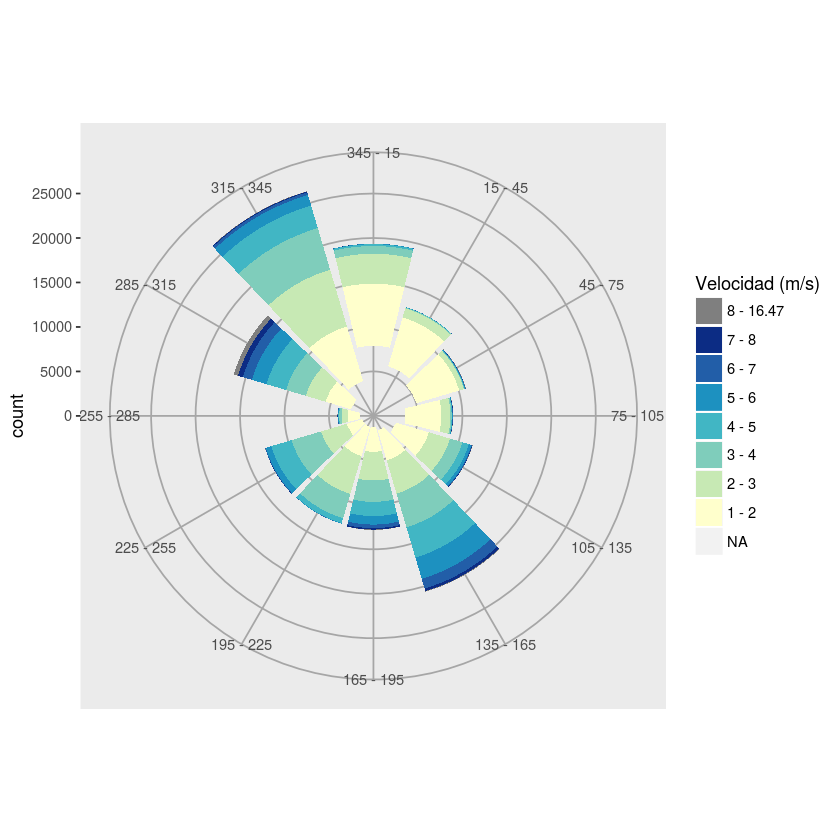

In [16]:
# try the default settings
p1 <- plot.windrose(spd = df_Wind$spd,
                   dir = df_Wind$dir)

Hadley broke my code


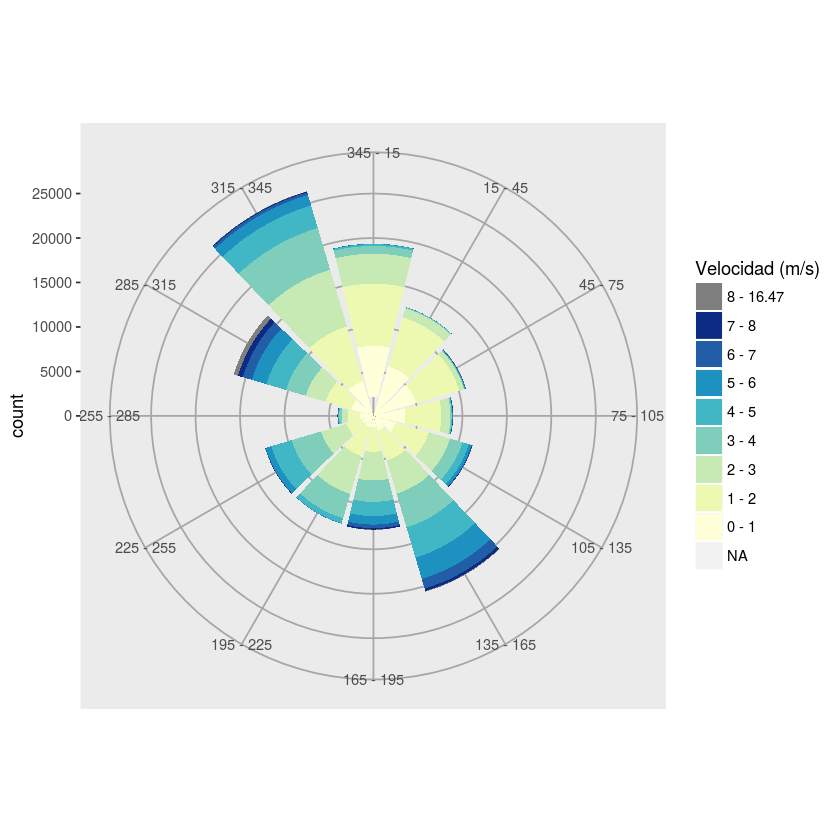

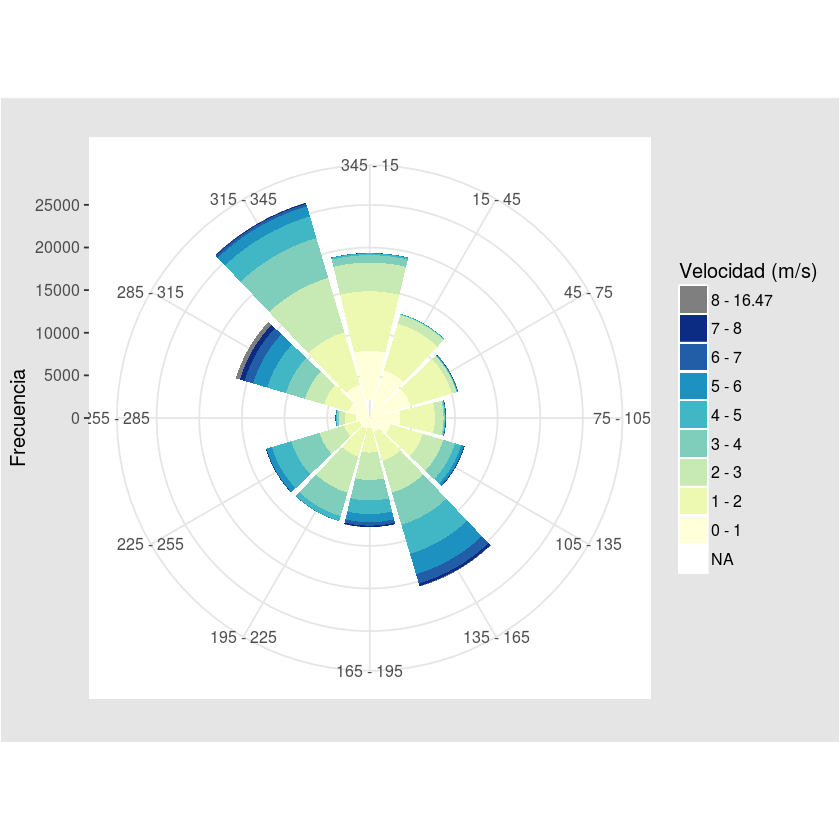

In [17]:
p2 <- plot.windrose(data=df_Wind, spd = df_Wind$spd,
                   dir = df_Wind$dir,
#                   spdseq = c(0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)) +
                     spdseq = c(0,1,2,3,4,5,6, 7, 8)) +
                    theme_gray() +
#                   ggtitle("Dirección y frecuencia de vientos promedio") +
                  ggtitle(" ") +
                   ylab("Frecuencia")  + # for the main title 
#                   xlab("Conos de direcciones de viento")
                 xlab(" ")
p2 + theme_igray() + scale_colour_wsj("colors6", "")

In [16]:
ls("package:ggthemes")[grepl("theme_", ls("package:ggthemes"))]

[1] "theme_base"            "theme_calc"            "theme_economist"      
 [4] "theme_economist_white" "theme_excel"           "theme_few"            
 [7] "theme_fivethirtyeight" "theme_foundation"      "theme_gdocs"          
[10] "theme_hc"              "theme_igray"           "theme_map"            
[13] "theme_pander"          "theme_par"             "theme_solarized"      
[16] "theme_solarized_2"     "theme_solid"           "theme_stata"          
[19] "theme_tufte"           "theme_wsj"